In [71]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from pycaret.regression import *
import pycaret
from catboost import CatBoostRegressor
import lightgbm as lgb
import pickle as pk
from sklearn.model_selection import cross_val_score

In [72]:
#!pip install pycaret

In [73]:
df = pd.read_csv("/content/CAR DETAILS FROM CAR DEKHO.csv")

In [74]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [75]:
encoder = LabelEncoder()

In [76]:
df.name=encoder.fit_transform(df.name)
df.fuel = encoder.fit_transform(df.fuel)
df.seller_type = encoder.fit_transform(df.seller_type)
df.transmission = encoder.fit_transform(df.transmission)
df.owner = encoder.fit_transform(df.owner)

In [77]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,775,2007,60000,70000,4,1,1,0
1,1041,2007,135000,50000,4,1,1,0
2,505,2012,600000,100000,1,1,1,0
3,118,2017,250000,46000,4,1,1,0
4,279,2014,450000,141000,1,1,1,2


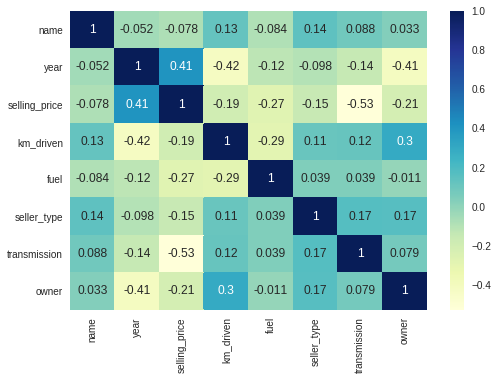

In [78]:
Corr = df.corr()

sns.heatmap(Corr, xticklabels=Corr.columns, yticklabels=Corr.columns, annot=True,cmap="YlGnBu")

In [79]:
x = df.drop(columns=["selling_price"])
y = df["selling_price"]

In [80]:
from pycaret.regression import *
reg1 = setup(data = df, target = 'selling_price')

#best = compare_models()

#top3 = compare_models(n_select = 3)

#best = compare_models(sort = 'R2') 

 
Setup Succesfully Completed.


,Description,Value
0,session_id,1160
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(4340, 8)"
4,Missing Values,False
5,Numeric Features,3
6,Categorical Features,4
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [81]:
lgbm = create_model('lightgbm', learning_rate = 0.1)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,112421.2636,52858780017.1626,229910.3739,0.8051,0.3629,0.3051
1,126666.2020,105409633788.3960,324668.4983,0.6761,0.3661,0.2848
2,131111.4774,52772207966.5815,229722.0233,0.8770,0.3347,0.2755
3,123755.6550,48726883338.6437,220741.6665,0.7808,0.3464,0.3092
4,100561.8530,32924724957.0426,181451.7152,0.8556,0.3078,0.2515
5,129926.6033,63605453764.1771,252201.2168,0.7643,0.3581,0.2974
6,109864.2114,69179606567.7675,263020.1638,0.6978,0.3784,0.2997
7,111270.4982,47263578756.1626,217401.8831,0.8368,0.3538,0.3108
8,111553.9538,33845049498.5239,183970.2408,0.8453,0.3731,0.2929
9,107434.0445,28953054311.0055,170155.9705,0.8956,0.3557,0.2764


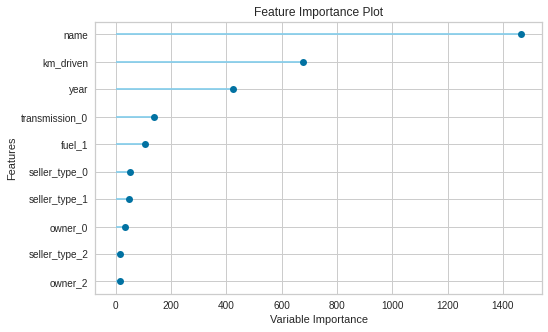

In [82]:
plot_model(lgbm,plot='feature')

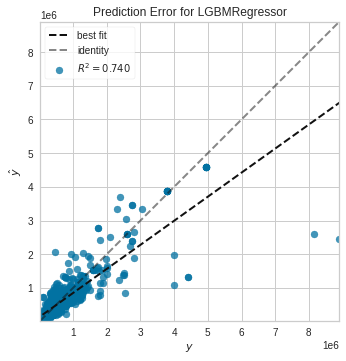

In [83]:
plot_model(lgbm,plot='error')

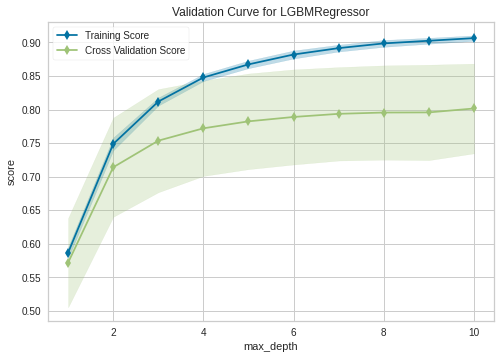

In [84]:
plot_model(lgbm,plot='vc')

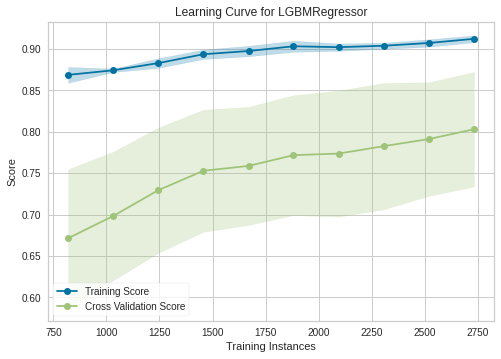

In [85]:
plot_model(lgbm,plot='learning')

In [86]:
X_train,X_test,Y_train,Y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [87]:
lgbm.fit(X_train,Y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=1160, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [88]:
pred = lgbm.predict(X_test)

In [89]:
#pk.dump(lgbm,open("moh_model.sav","wb"))

In [91]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,775,2007,60000,70000,4,1,1,0
1,1041,2007,135000,50000,4,1,1,0
2,505,2012,600000,100000,1,1,1,0
3,118,2017,250000,46000,4,1,1,0
4,279,2014,450000,141000,1,1,1,2


In [92]:
scores = cross_val_score(lgbm , x, y,cv=5)

In [93]:
final_score = sum(scores)/len(scores)
final_score

0.8014156481793986

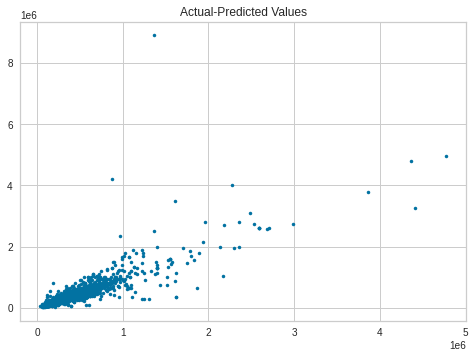

In [94]:
plt.plot(pred,Y_test,".")

plt.title("Actual-Predicted Values")
plt.show()